# Online Retail Customer Analysis 

### Hyphothesis
- The revenue generated from new customers (first-time buyers) differs from that of repeat customers.
- Certain countries exhibit higher customer retention rates.
    
#### Data
> [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii) on UCI Machine Learning Repository

**Expected Outcome:**
Based on the hypothesis, you might find that repeat customers generate more revenue than new customers over time. Additionally, specific countries may exhibit higher customer retention rates, leading to higher overall revenue contributions.

In [473]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from IPython.display import Image

### 0. Data Preprocessing

In [475]:
# import the data and parse the date column
df = pd.read_csv("online_retail.csv", parse_dates=['InvoiceDate'])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [477]:
df.isna().sum()
# there are missing values in Customer ID column

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [479]:
# remove the missing values in the Customer ID
# we decided to remove them since the values will be used in the analysis
df.dropna(axis=0, subset="Customer ID", inplace=True)

In [480]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [481]:
# Customer ID has float value, convert it to be str
df["Customer ID"] = df["Customer ID"].astype('int').astype('str')

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  object        
 7   Country      406830 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [485]:
# to conduct a cohort analysis in 2011, we will drop data in 2010
num_2010 = (df["InvoiceDate"].dt.year == 2010).sum()
num_2010

26850

In [486]:
(df['InvoiceDate'].dt.year == 2011).sum()

379980

In [487]:
(len(df) - num_2010)

379980

In [488]:
df = df[df["InvoiceDate"].dt.year == 2011] # only include data in 2011

In [489]:
(df.InvoiceDate.dt.year == 2011).value_counts() # data in 2010 was successfully dropped

True    379980
Name: InvoiceDate, dtype: int64

In [490]:
# add "Revenue" column
df["Revenue"] = df.Quantity * df.Price
df.Revenue

42481     19.50
42482     10.50
42483     10.50
42484     10.50
42485     12.50
          ...  
541905    12.60
541906    16.60
541907    16.60
541908    14.85
541909    18.00
Name: Revenue, Length: 379980, dtype: float64

In [491]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5


In [236]:
df.to_csv("online_retail_2011.csv")

In [10]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### 1. Customer Segmentaion
- Segment customers based on their purchasing behavior, such as new customers (first-time buyers) and repeat customers (returning buyers). Use the 'Customer ID' and 'InvoiceDate' fields to determine the customer's first purchase date.

In [15]:
df.sort_values(['Customer ID', 'InvoiceDate'], ascending=True, inplace=True)

In [16]:
# Find the first purchase date for each customer
first_purchase_date = df.groupby('Customer ID')['InvoiceDate'].first().reset_index()
first_purchase_date

,Customer ID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-01-26 14:30:00
2,12348.0,2011-01-25 10:42:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4239,18280.0,2011-03-07 09:52:00
4240,18281.0,2011-06-12 10:53:00
4241,18282.0,2011-08-05 13:35:00
4242,18283.0,2011-01-06 14:14:00


In [17]:
# Merge the first purchase date back to the original DataFrame
df = pd.merge(df, first_purchase_date, on='Customer ID', suffixes=('', '_FirstPurchase'))
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_FirstPurchase
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00
2,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2011-01-26 14:30:00
3,542237,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2011-01-26 14:30:00
4,542237,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2011-01-26 14:30:00,2.10,12347.0,Iceland,2011-01-26 14:30:00
...,...,...,...,...,...,...,...,...,...
379975,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,2011-05-22 10:39:00
379976,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,2011-05-22 10:39:00
379977,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,2011-05-22 10:39:00
379978,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,2011-05-22 10:39:00


In [18]:
# Create a new column 'Customer Type' to indicate new or returning customers
df['Customer Type'] = df['InvoiceDate'] == df['InvoiceDate_FirstPurchase']

In [19]:
# Convert boolean values in 'Customer Type' to 'New' or 'Returning'
df['Customer Type'] = df['Customer Type'].map({True: 'New', False: 'Returning'})

In [21]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_FirstPurchase,Customer Type
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,New
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,Returning
2,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2011-01-26 14:30:00,New
3,542237,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347.0,Iceland,2011-01-26 14:30:00,New
4,542237,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2011-01-26 14:30:00,2.10,12347.0,Iceland,2011-01-26 14:30:00,New


In [108]:
customers = set(df["Customer ID"])
customers

{'14407',
 '14953',
 '16142',
 '16380',
 '13468',
 '12364',
 '13689',
 '12463',
 '18172',
 '12448',
 '13867',
 '14047',
 '14924',
 '12990',
 '16153',
 '15657',
 '14052',
 '17796',
 '18065',
 '14364',
 '12693',
 '17709',
 '14034',
 '13294',
 '15740',
 '12552',
 '12656',
 '15516',
 '14690',
 '17449',
 '18158',
 '15584',
 '13362',
 '13592',
 '16193',
 '13812',
 '13868',
 '13115',
 '16450',
 '16404',
 '17351',
 '13103',
 '14321',
 '16473',
 '17230',
 '14642',
 '18110',
 '16722',
 '16648',
 '13780',
 '13627',
 '12672',
 '14881',
 '17650',
 '13485',
 '16776',
 '15088',
 '13955',
 '15215',
 '13075',
 '13068',
 '15692',
 '14012',
 '15389',
 '15827',
 '16122',
 '13338',
 '15748',
 '16882',
 '12701',
 '16841',
 '17221',
 '16951',
 '17131',
 '14257',
 '17897',
 '14438',
 '16929',
 '15099',
 '16943',
 '17206',
 '15491',
 '15860',
 '13244',
 '14544',
 '16553',
 '15645',
 '16617',
 '14463',
 '17951',
 '12507',
 '12756',
 '18145',
 '18277',
 '12723',
 '16061',
 '16038',
 '14333',
 '16378',
 '17229',


In [109]:
# 재주문 고객
returning_customers = set(df[df["Customer Type"] == "Returning"]["Customer ID"])
len(retunring_customers)

2923

In [110]:
# 일회 주문 고객
once_customers = customers - returning_customers
once_customers

{'14953',
 '16142',
 '16380',
 '13689',
 '12448',
 '14924',
 '15657',
 '14052',
 '17709',
 '15740',
 '16193',
 '16450',
 '16404',
 '13103',
 '14642',
 '17650',
 '14881',
 '12672',
 '13485',
 '16776',
 '13075',
 '15692',
 '14012',
 '15389',
 '15748',
 '17897',
 '14438',
 '15099',
 '17206',
 '13244',
 '14544',
 '16617',
 '15645',
 '17951',
 '12756',
 '16061',
 '14782',
 '13833',
 '13154',
 '17070',
 '13751',
 '15753',
 '13721',
 '13934',
 '13682',
 '17775',
 '17498',
 '16505',
 '15012',
 '15957',
 '15076',
 '14130',
 '15466',
 '15041',
 '15992',
 '17499',
 '13349',
 '16287',
 '14806',
 '12984',
 '16213',
 '15988',
 '17154',
 '17878',
 '16425',
 '14552',
 '13256',
 '15574',
 '17701',
 '14847',
 '14039',
 '18216',
 '14886',
 '15006',
 '15149',
 '17879',
 '12740',
 '15261',
 '18027',
 '15637',
 '17111',
 '13144',
 '17219',
 '17508',
 '17026',
 '17239',
 '15019',
 '16545',
 '12713',
 '13638',
 '15659',
 '12538',
 '13572',
 '14756',
 '12659',
 '14080',
 '16367',
 '17582',
 '18156',
 '13887',


In [111]:
len(once_customers)

1321

In [114]:
# 재주문 고객 주문 데이터
df_return = df[df["Customer ID"].isin(returning_customers)]
df_return

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_FirstPurchase,Customer Type,Revenue
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18 10:01:00,New,77183.60
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18 10:01:00,Returning,-77183.60
2,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,2011-01-26 14:30:00,New,20.40
3,542237,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,2011-01-26 14:30:00,New,20.40
4,542237,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2011-01-26 14:30:00,2.10,12347,Iceland,2011-01-26 14:30:00,New,12.60
...,...,...,...,...,...,...,...,...,...,...,...
379975,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,2011-05-22 10:39:00,Returning,5.04
379976,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,2011-05-22 10:39:00,Returning,25.20
379977,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,2011-05-22 10:39:00,Returning,45.00
379978,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,2011-05-22 10:39:00,Returning,18.72


In [115]:
# 일회 주문 고객 데이터
df_once = df[df["Customer ID"].isin(once_customers)]
df_once

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_FirstPurchase,Customer Type,Revenue
167,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,12349,Italy,2011-11-21 09:51:00,New,15.00
168,577609,23460,SWEETHEART WALL TIDY,2,2011-11-21 09:51:00,9.95,12349,Italy,2011-11-21 09:51:00,New,19.90
169,577609,21564,PINK HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,12349,Italy,2011-11-21 09:51:00,New,17.70
170,577609,21411,GINGHAM HEART DOORSTOP RED,3,2011-11-21 09:51:00,4.25,12349,Italy,2011-11-21 09:51:00,New,12.75
171,577609,21563,RED HEART SHAPE LOVE BUCKET,6,2011-11-21 09:51:00,2.95,12349,Italy,2011-11-21 09:51:00,New,17.70
...,...,...,...,...,...,...,...,...,...,...,...
379136,556464,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,18281,United Kingdom,2011-06-12 10:53:00,New,5.04
379137,556464,23007,SPACEBOY BABY GIFT SET,1,2011-06-12 10:53:00,16.95,18281,United Kingdom,2011-06-12 10:53:00,New,16.95
379138,556464,23008,DOLLY GIRL BABY GIFT SET,1,2011-06-12 10:53:00,16.95,18281,United Kingdom,2011-06-12 10:53:00,New,16.95
379139,556464,23209,LUNCH BAG DOILEY PATTERN,10,2011-06-12 10:53:00,1.65,18281,United Kingdom,2011-06-12 10:53:00,New,16.50


In [213]:
len(new_customer_metrics), len(return_customer_metrics)

(1321, 2923)

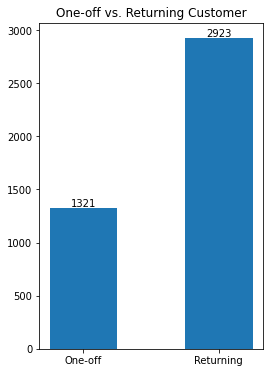

In [472]:
fig, ax = plt.subplots(facecolor='None', figsize=(4,6))
bins = [0, 1, 2]

# Use plt.hist() with specified width to create the bar plot
bar_plot = plt.bar(['One-off','Returning'], [len(new_customer_metrics), len(return_customer_metrics)],
       width=0.5)
ax.bar_label(bar_plot)
ax.set(facecolor='None')
plt.title("One-off vs. Returning Customer")

plt.show()

### 2. Customer Lifetime Value (LTV) Analysis
Calculate the LTV for new customers and repeat customers separately to understand their long-term value to the business.

In [34]:
revenue_per_customers = df.groupby("Customer ID")["Revenue"].sum().reset_index()
revenue_per_customers

,Customer ID,Revenue
0,12346.0,0.00
1,12347.0,3598.21
2,12348.0,904.44
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4239,18280.0,180.60
4240,18281.0,80.82
4241,18282.0,176.60
4242,18283.0,2094.88


In [36]:
n_orders_per_customers = df.groupby("Customer ID")["Invoice"].count().reset_index()
n_orders_per_customers

,Customer ID,Invoice
0,12346.0,2
1,12347.0,151
2,12348.0,14
3,12349.0,73
4,12350.0,17
...,...,...
4239,18280.0,10
4240,18281.0,7
4241,18282.0,13
4242,18283.0,756


In [116]:
new_customer_metrics = df_once.groupby('Customer ID').agg(
    total_revenue=('Revenue', 'sum'),
    purchase_count=('Revenue', 'count'),
    first_purchase_date=('InvoiceDate', 'min'),
    last_purchase_date=('InvoiceDate', 'max')
).reset_index()

In [117]:
return_customer_metrics = df_return.groupby('Customer ID').agg(
    total_revenue=('Revenue', 'sum'),
    purchase_count=('Revenue', 'count'),
    first_purchase_date=('InvoiceDate', 'min'),
    last_purchase_date=('InvoiceDate', 'max')
).reset_index()

In [118]:
new_customer_metrics

,Customer ID,total_revenue,purchase_count,first_purchase_date,last_purchase_date
0,12349,1757.55,73,2011-11-21 09:51:00,2011-11-21 09:51:00
1,12350,334.40,17,2011-02-02 16:01:00,2011-02-02 16:01:00
2,12353,89.00,4,2011-05-19 17:47:00,2011-05-19 17:47:00
3,12354,1079.40,58,2011-04-21 13:11:00,2011-04-21 13:11:00
4,12355,459.40,13,2011-05-09 13:49:00,2011-05-09 13:49:00
...,...,...,...,...,...
1316,18255,103.30,6,2011-09-11 13:16:00,2011-09-11 13:16:00
1317,18262,149.48,13,2011-07-22 16:04:00,2011-07-22 16:04:00
1318,18278,173.90,9,2011-09-27 11:58:00,2011-09-27 11:58:00
1319,18280,180.60,10,2011-03-07 09:52:00,2011-03-07 09:52:00


In [124]:
# 일회 주문 고객 LTV
# Calculate customer lifetimes
new_customer_metrics['customer_lifetime'] = (new_customer_metrics['last_purchase_date'] - new_customer_metrics['first_purchase_date']).dt.days

# Calculate average customer lifetime
new_average_customer_lifetime = new_customer_metrics['customer_lifetime'].mean()

# Calculate average revenue per customer
new_average_revenue_per_customer = new_customer_metrics['total_revenue'].mean()

# Calculate Customer Lifetime Value (LTV), LTV = 1일로 계산
new_ltv = new_average_revenue_per_customer 
print(f"Average LTV(€): {round(new_ltv,2):,.2f}")

Average LTV(€): 334.55


In [126]:
# 재주문 고객 LTV
# Calculate customer lifetimes
return_customer_metrics['customer_lifetime'] = (return_customer_metrics['last_purchase_date'] - return_customer_metrics['first_purchase_date']).dt.days

# Calculate average customer lifetime
return_average_customer_lifetime = return_customer_metrics['customer_lifetime'].mean()

# Calculate average revenue per customer
return_average_revenue_per_customer = return_customer_metrics['total_revenue'].mean()

# Calculate Customer Lifetime Value (LTV)
return_ltv = return_average_revenue_per_customer * return_average_customer_lifetime
print(f"Average LTV(€): {round(return_ltv,2):,.2f}")

Average LTV(€): 426,316.97


In [309]:
return_customer_metrics.customer_lifetime.max()

339

Average LTV(€): 214,463.98

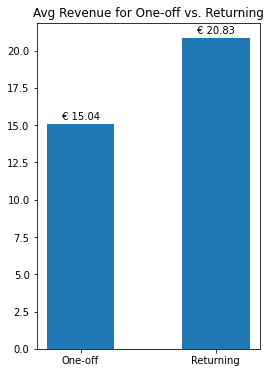

In [471]:
# 일회 구매 고객 vs. 재구매고객 AVG(Revenue)
fig, ax = plt.subplots(facecolor='None', figsize=(4,6))
bar_plot = ax.bar(["One-off", "Returning"], 
       [df_once.Revenue.mean(), df_return.Revenue.mean()],
       width=0.5)
ax.bar_label(bar_plot, padding=3, fmt='€ %.2f')
ax.set(facecolor='None')
ax.set(title="Avg Revenue for One-off vs. Returning");

### 3. Revenue by Country Analysis
Aggregate revenue by country to identify which countries are significant contributors to overall revenue. Visualize the revenue distribution across different countries using bar charts or other visualizations.

In [215]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_FirstPurchase,Customer Type,Revenue
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18 10:01:00,New,77183.60
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18 10:01:00,Returning,-77183.60
2,542237,84625A,PINK NEW BAROQUECANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,2011-01-26 14:30:00,New,20.40
3,542237,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,24,2011-01-26 14:30:00,0.85,12347,Iceland,2011-01-26 14:30:00,New,20.40
4,542237,85116,BLACK CANDELABRA T-LIGHT HOLDER,6,2011-01-26 14:30:00,2.10,12347,Iceland,2011-01-26 14:30:00,New,12.60
...,...,...,...,...,...,...,...,...,...,...,...
379975,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287,United Kingdom,2011-05-22 10:39:00,Returning,5.04
379976,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287,United Kingdom,2011-05-22 10:39:00,Returning,25.20
379977,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287,United Kingdom,2011-05-22 10:39:00,Returning,45.00
379978,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287,United Kingdom,2011-05-22 10:39:00,Returning,18.72


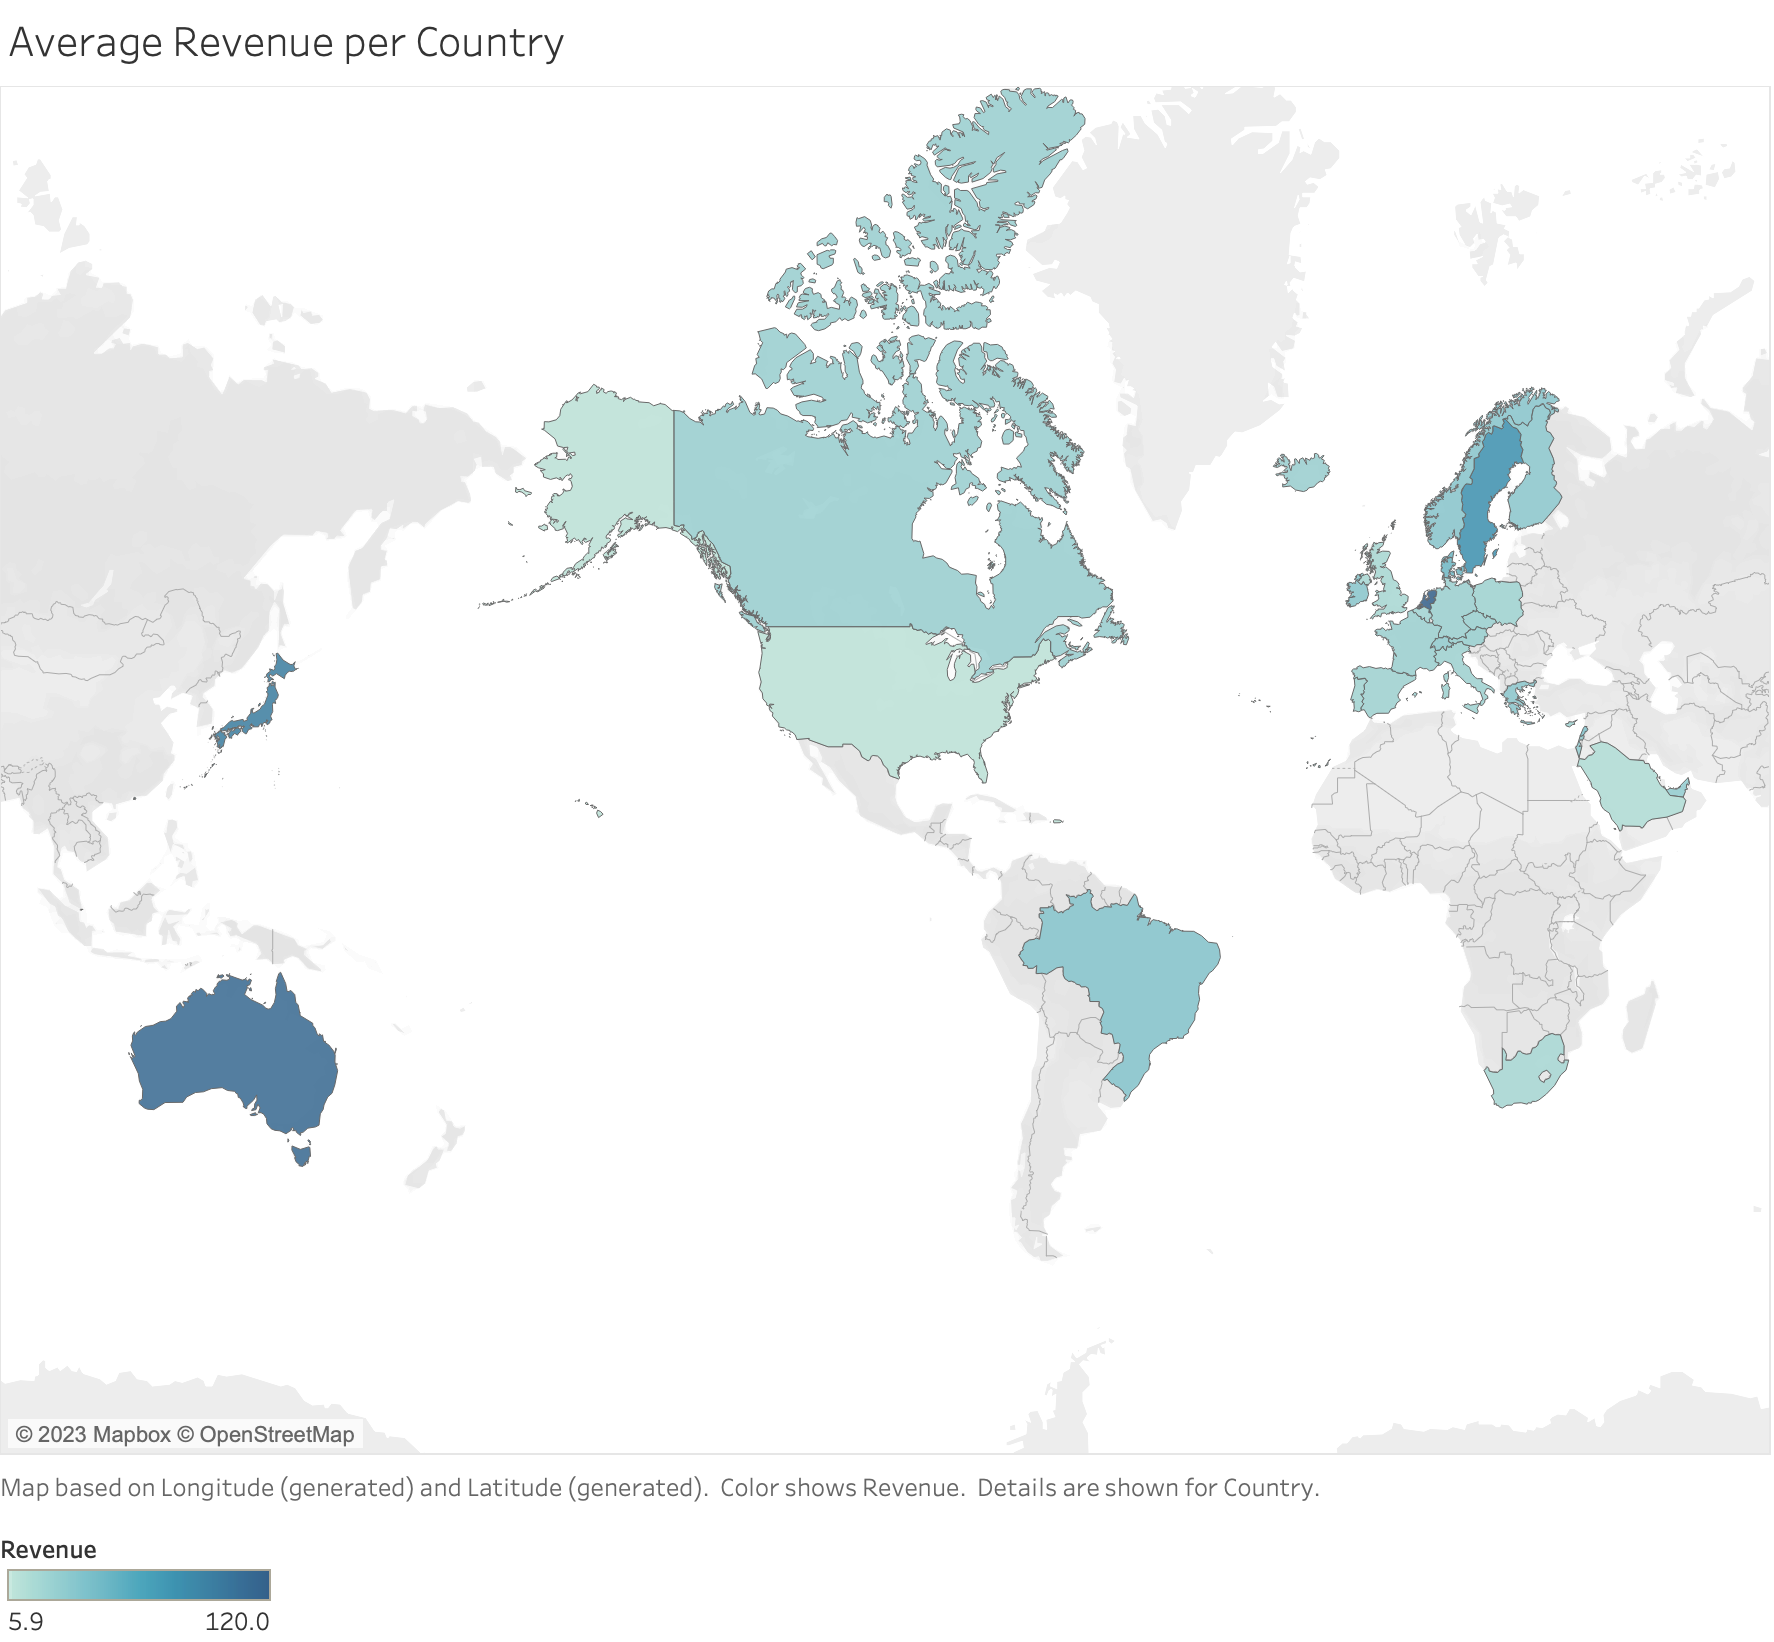

In [310]:
Image(filename='Average Revenue per Country.png')

### 4. Cohort Analysis
If you have complete historical data or can derive the cohort information from the 'InvoiceDate' field, conduct cohort analysis to explore how customer spending and retention change over time for different cohorts.

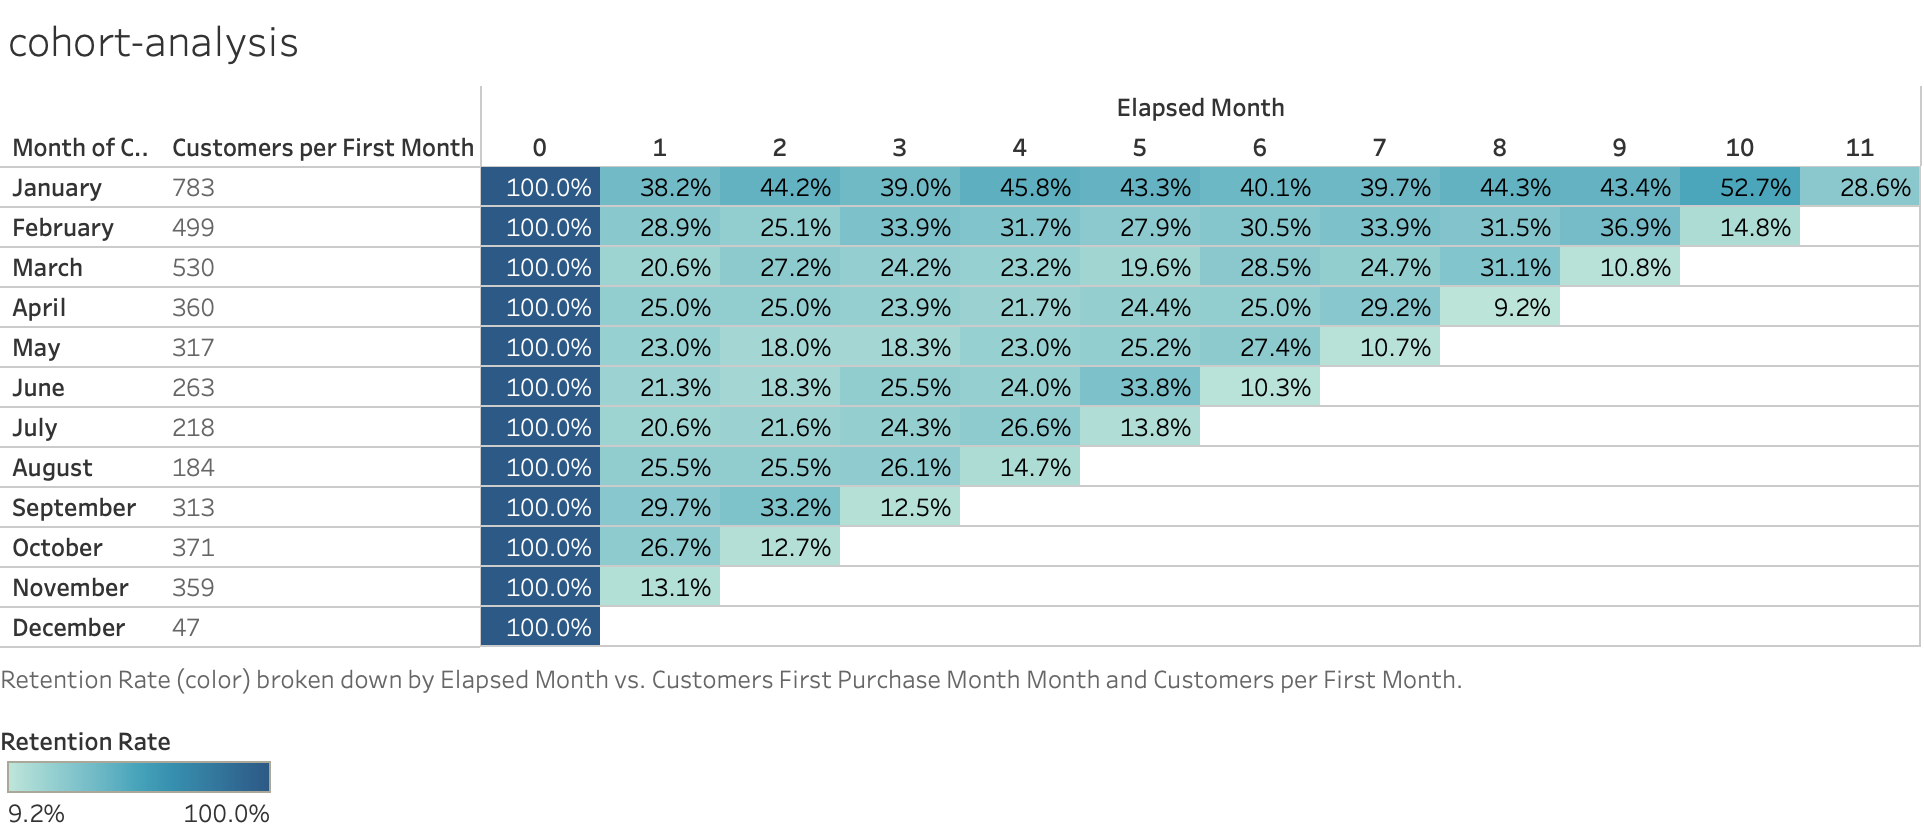

In [20]:
Image(filename='cohort-analysis.png')

### 5. Price and Quantity Analysis
Analyze the relationship between the 'Price' and 'Quantity' fields to understand which products are more profitable and which products are sold in higher quantities.

In [311]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [325]:
avg_revenue_per_item = df.groupby(["StockCode", "Description"])["Revenue"].mean()
avg_revenue_per_item.sort_values(ascending=False, inplace=True)
avg_revenue_per_item[:10], len(avg_revenue_per_item)

(StockCode  Description                      
 22502      PICNIC BASKET WICKER 60 PIECES       19809.7500
 47556B     TEA TIME TEA TOWELS                   3022.5000
 23131      MISELTOE HEART WREATH CREAM            996.0000
 DOT        DOTCOM POSTAGE                         744.1475
 20914      SET/5 RED SPOTTY LID GLASS BOWLS       734.4000
 21897      POTTING SHED CANDLE CITRONELLA         625.4100
 20725      LUNCH BAG RED SPOTTY                   290.0000
 22783      SET 3 WICKER OVAL BASKETS W LIDS       272.6160
 22965      3 TRADITIONAL COOKIE CUTTERS  SET      266.4000
 22828      REGENCY MIRROR WITH SHUTTERS           227.5000
 Name: Revenue, dtype: float64,
 3820)

In [326]:
avg_revenue_per_item = df.groupby("StockCode")["Revenue"].mean()
avg_revenue_per_item.sort_values(ascending=False, inplace=True)
avg_revenue_per_item[:10], len(avg_revenue_per_item)

(StockCode
 47556B    3022.500000
 DOT        744.147500
 21897      625.410000
 22783      272.616000
 22828      227.500000
 22823      218.333333
 22502      210.441364
 21898      203.290000
 23134      173.364324
 22827      168.333333
 Name: Revenue, dtype: float64,
 3612)

In [351]:
top_items = pd.DataFrame(avg_revenue_per_item.items(), columns=["code", "avg_revenue"])
top10 = top_items[:10]
top10

,code,avg_revenue
0,47556B,3022.500000
1,DOT,744.147500
2,21897,625.410000
3,22783,272.616000
4,22828,227.500000
5,22823,218.333333
6,22502,210.441364
7,21898,203.290000
8,23134,173.364324
9,22827,168.333333


[Text(0.5, 1.0, 'Top 10 Revenue per Items'), None]

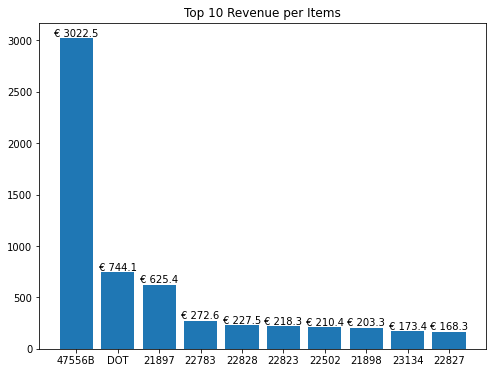

In [376]:
fig, ax = plt.subplots(figsize=(8,6))
fig.set(facecolor='None')
bar_plot = plt.bar(top10.code, top10.avg_revenue)
ax.bar_label(bar_plot, fmt="€ %.1f")
ax.set(title="Top 10 Revenue per Items", facecolor='None')

In [379]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [395]:

for item in top10.code:
    print("\nStockCode: ", item, "\nDescription:", df[df.StockCode == item].Description)


StockCode:  47556B 
Description: 52771     TEA TIME TEA TOWELS 
160543    TEA TIME TEA TOWELS 
Name: Description, dtype: object

StockCode:  DOT 
Description: 317507    DOTCOM POSTAGE
324002    DOTCOM POSTAGE
333756    DOTCOM POSTAGE
338830    DOTCOM POSTAGE
350600    DOTCOM POSTAGE
361584    DOTCOM POSTAGE
372766    DOTCOM POSTAGE
389984    DOTCOM POSTAGE
401766    DOTCOM POSTAGE
416464    DOTCOM POSTAGE
429588    DOTCOM POSTAGE
455261    DOTCOM POSTAGE
467437    DOTCOM POSTAGE
494727    DOTCOM POSTAGE
508459    DOTCOM POSTAGE
528083    DOTCOM POSTAGE
Name: Description, dtype: object

StockCode:  21897 
Description: 132903    POTTING SHED CANDLE CITRONELLA
169712    POTTING SHED CANDLE CITRONELLA
Name: Description, dtype: object

StockCode:  22783 
Description: 44566     SET 3 WICKER OVAL BASKETS W LIDS
44850     SET 3 WICKER OVAL BASKETS W LIDS
47917     SET 3 WICKER OVAL BASKETS W LIDS
52107     SET 3 WICKER OVAL BASKETS W LIDS
52760     SET 3 WICKER OVAL BASKETS W LIDS
59004     S

In [400]:
item_list = ['TEA TIME TEA TOWELS', 'DOTCOM POSTAGE', 'POTTING SHED CANDLE CITRONELLA',
            'SET 3 WICKER OVAL BASKETS W LIDS', 'REGENCY MIRROR WITH SHUTTERS',
            'CHEST NATURAL WOOD 20 DRAWERS', 'PICNIC BASKET WICKER SMALL',
            'POTTING SHED ROSE CANDLE', 'LARGE ZINC HEART WALL ORGANISER',
             'RUSTIC  SEVENTEEN DRAWER SIDEBOARD']
for item in item_list:
    print(item)

TEA TIME TEA TOWELS
DOTCOM POSTAGE
POTTING SHED CANDLE CITRONELLA
SET 3 WICKER OVAL BASKETS W LIDS
REGENCY MIRROR WITH SHUTTERS
CHEST NATURAL WOOD 20 DRAWERS
PICNIC BASKET WICKER SMALL
POTTING SHED ROSE CANDLE
LARGE ZINC HEART WALL ORGANISER
RUSTIC  SEVENTEEN DRAWER SIDEBOARD


### 6. Purchase Patterns and Seasonality
Analyze the 'InvoiceDate' field to identify any patterns in customer purchasing behavior, such as seasonal spikes or recurring purchasing patterns.

In [401]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

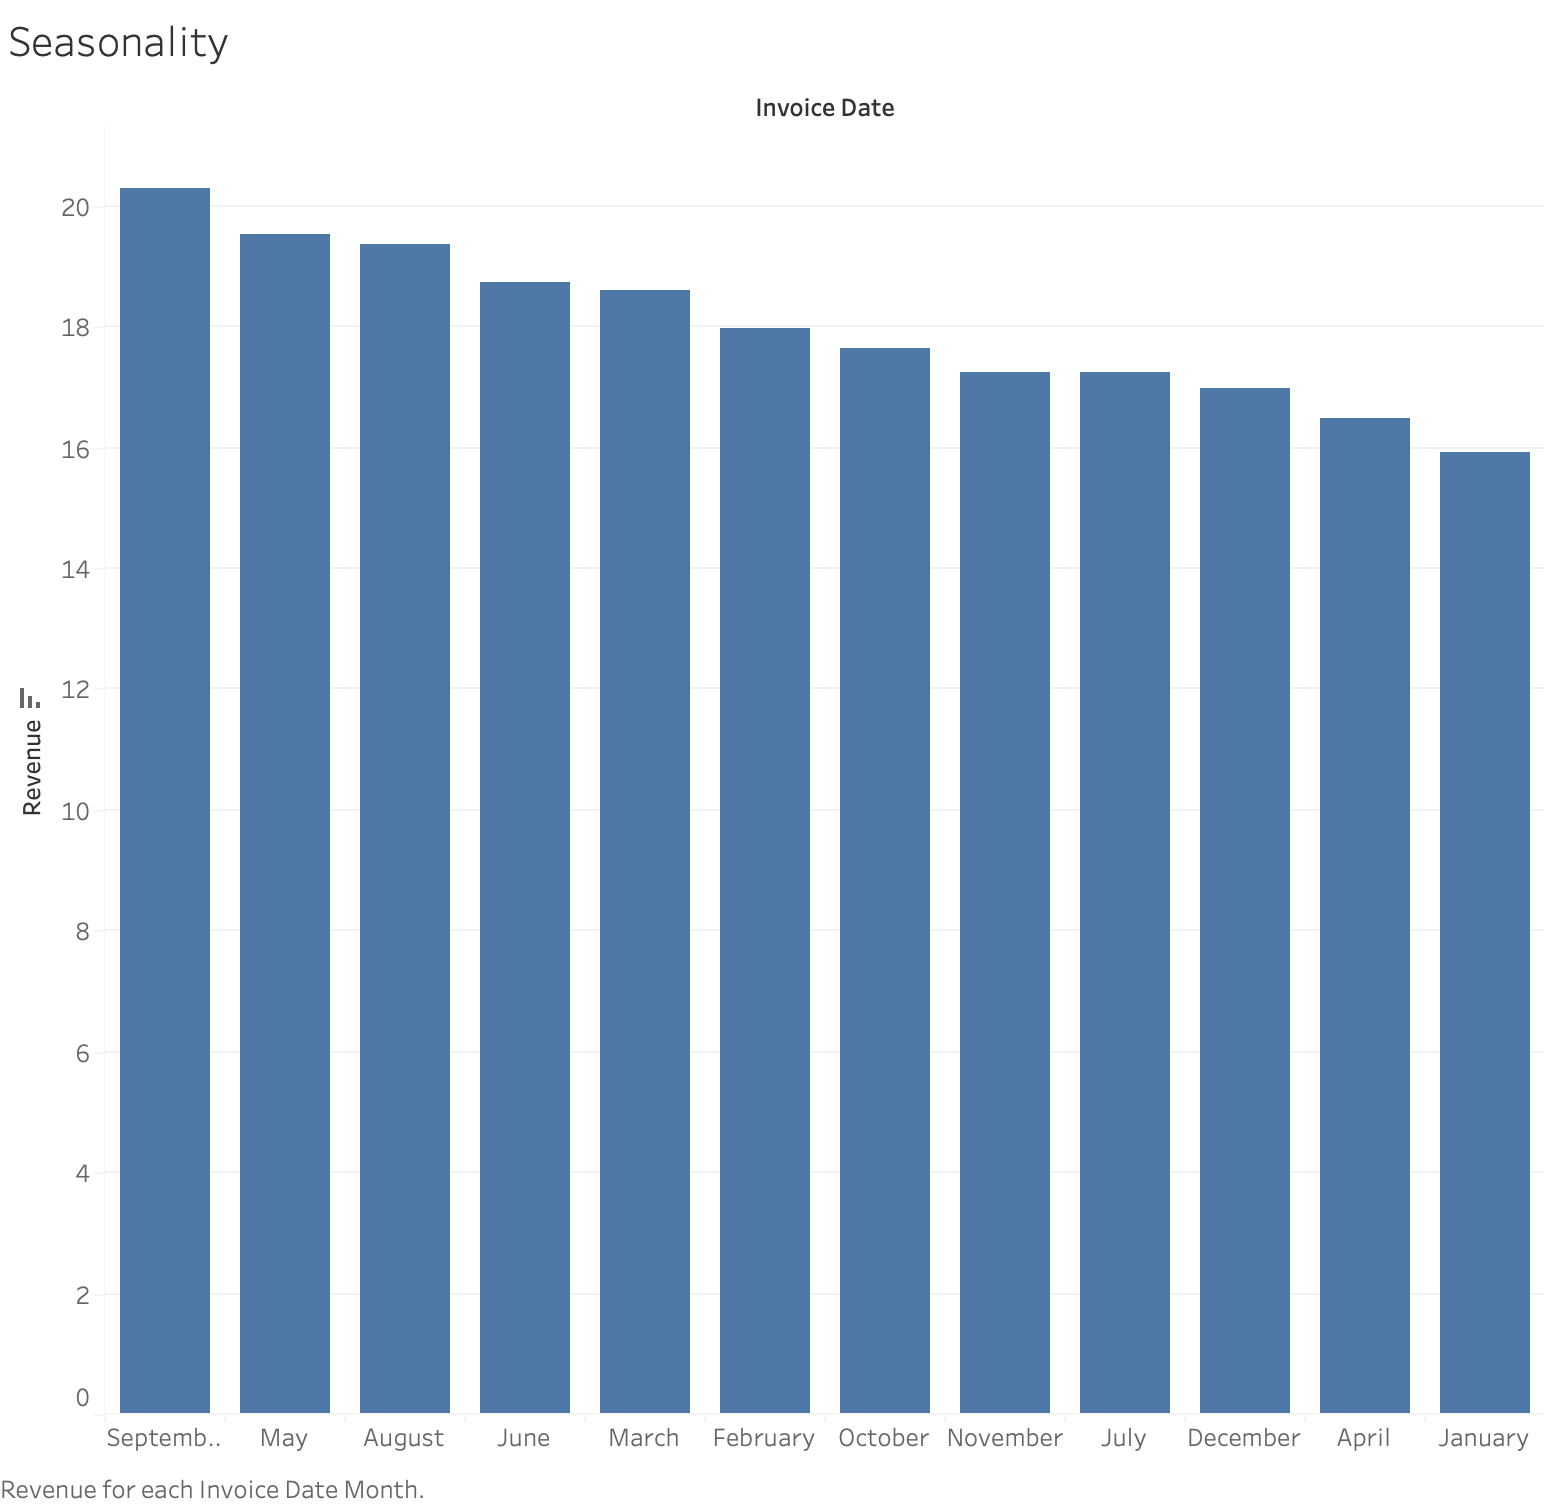

In [415]:
Image(filename="Seasonality.png", width=300, height=100)

### 7. Customer Churn Analysis 
If you have more data or can derive the churn information, analyze customer churn rate to understand customer retention and identify opportunities for reducing churn.

In [426]:
len(new_customer_metrics), len(retunring_customers)

(1321, 2923)

In [425]:
unique_customers = set(df["Customer ID"])
len(unique_customers)

4244

In [435]:
print(f'Customer Churn Rate: {len(new_customer_metrics)/len(unique_customers)*100:.2f}%')

Customer Churn Rate: 31.13%


In [437]:
import scipy.stats as stats

# Assuming you have two separate DataFrames or arrays for churn and returning customers
churn_revenue = df_once['Revenue']
returning_revenue = df_return['Revenue']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(churn_revenue, returning_revenue)

# Check the p-value to determine if there is a statistically significant difference
alpha = 0.05  # Set the significance level (commonly 0.05)
if p_value < alpha:
    print("There is a statistically significant difference in average revenue.")
else:

    print("There is no statistically significant difference in average revenue.")

There is a statistically significant difference in average revenue.


In [440]:
round(p_value,2)

0.03

In [439]:
t_statistic

-2.1555093577219

In [441]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')

In [444]:
df_country = df.groupby("Country")["Revenue"]
df_country

In [445]:
import scipy.stats as stats

# Assuming you have a DataFrame 'df' with columns "Country" and "Revenue"
# Group the data by "Country" and get the revenue for each country
grouped_revenue = df.groupby("Country")["Revenue"]

# Convert the grouped revenue data into a dictionary
revenue_dict = {country: group.values for country, group in grouped_revenue}

# Perform the one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*revenue_dict.values())

# Set the significance level (commonly 0.05)
alpha = 0.05

# Check the p-value to determine if there are statistically significant differences
if p_value < alpha:
    print("There are statistically significant differences in revenue among different countries.")
else:
    print("There are no statistically significant differences in revenue among different countries.")


There are statistically significant differences in revenue among different countries.


In [449]:
p_value

2.418682344169469e-25

In [ ]:
# LTV = (ARPU / Churn Rate) * ((1 - Churn Rate) / r)


In [451]:
churn = len(once_customers)/len(customers)
churn

0.31126295947219607

In [467]:
ARPU = df_return.Revenue.mean()
ARPU

20.831251587969373

In [469]:
df_return["Revenue"].mean()

20.831251587969373

In [470]:
df_once["Revenue"].mean()

15.044726161702128

In [455]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.50
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.50
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.50
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.50
...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [465]:
n_avg_purchase = df.groupby("Customer ID")["Invoice"].nunique()

In [466]:
round(n_avg_purchase.mean() * ARPU,2)

98.37

In [454]:
LTV = (ARPU/churn)*((1-churn)/0.055)
LTV

820.0699441664779